<a href="https://colab.research.google.com/github/shaniklein/Introduction-to-Deep-Learning/blob/main/train_with_pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display

In [9]:
import sys
from google.colab import drive
drive.mount('/content/gdrive/')
sys.path.append('/content/gdrive/My Drive/Intro_to_Deep_Learning/Final_project')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [10]:
!pip install -U tensorboard

Requirement already up-to-date: tensorboard in /usr/local/lib/python3.7/dist-packages (2.5.0)


## Load the dataset
We used ADE20K Outdoors which contains 5,000 outdoor images from the ADE20K image segmentation landmark dataset . 

* In random jittering, the image is resized to `286 x 286` and then randomly cropped to `256 x 256`
* In random mirroring, the image is randomly flipped horizontally i.e left to right.

In [11]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [33]:
def load(image_file):
  im_type=image_file.split('.')[1]
  print(im_type)
  image = tf.io.read_file(image_file)
  if(im_type=='jpg'):
    image = tf.image.decode_jpeg(image)
  elif (im_type=='png'):
    image = tf.image.decode_png(image)

  image=tf.cast(image, tf.float32)
  # w = tf.shape(image)[1]

  # w = w // 2
  # real_image = image[:, :w, :]
  # input_image = image[:, w:, :]

  # input_image = tf.cast(input_image, tf.float32)
  # real_image = tf.cast(real_image, tf.float32)

  return image
  # input_image, real_image

In [14]:
PATH='/content/gdrive/MyDrive/Intro_to_Deep_Learning/Final_project/ade20k_outdoors'


In [30]:
im_path=PATH+'/images/training/ADE_train_00020201.jpg'


'jpg'

png
jpg


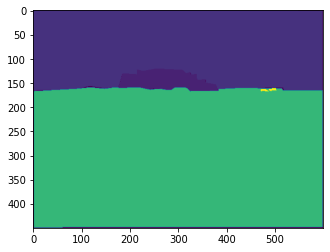

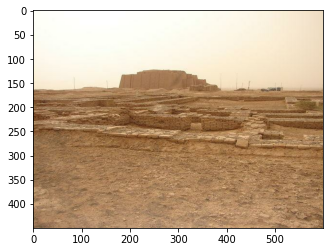

In [45]:
inp = load(PATH+'/annotations/training/ADE_train_00020201.png')
re = load(PATH+'/images/training/ADE_train_00020201.jpg')

# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp[:,:,0]/255.0)
plt.figure()
plt.imshow(re/255.0)